# Sript for Understanding Vol and Speed Over Time and Space
Date: 11/11/2019<br/>
Create by: Apoorb

## Load Libraries

In [1]:
%matplotlib inline
import pandas as pd
from pandas import Series
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from io import BytesIO as StringIO 
import numpy as np
import seaborn as sns
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime
import os
import re
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import shapely.geometry as geom

plt.style.use('seaborn-darkgrid')
sns.set(rc={'figure.figsize':(11,4)})
figDir = r'C:\Users\abibeka\OneDrive - Kittelson & Associates, Inc\Documents\Github\Hive-SDC\FreevalPlots'

## Read the NPMRDS data

Fix the route # so the EB and WB # are the same. Need for Plotting Purposes

In [3]:
datDir = r'C:\Users\abibeka\OneDrive - Kittelson & Associates, Inc\Documents\CVPD\I80_Laramie-to-Cheyenne_Feb_2018'
TmcFile = os.path.join(datDir, 'TMC_Identification.csv')
TmcDat = pd.read_csv(TmcFile)
TmcDat1 = TmcDat[['tmc','direction','road_order','miles']]
TmcDat1.loc[:,'RouteNo'] = TmcDat1.tmc.apply(lambda x: re.split('[-+NP]',x)[1])
TmcDat1.loc[:,'Sep'] = TmcDat1.tmc.apply(lambda x: x[3:4])
TmcDat1.loc[:,'CorRouteNo'] = TmcDat1.loc[:,'RouteNo'].astype(int)
TmcDat1.loc[TmcDat1.Sep=='-','CorRouteNo'] = TmcDat1.loc[TmcDat1.Sep=='-','RouteNo'].astype(int)+1
mask = (TmcDat1.Sep=='N') |(TmcDat1.Sep=='P')
TmcDat1.loc[mask,'Sep'] = 'Int'
mask2 = (TmcDat1.Sep=='Int')
TmcDat1.loc[mask2,'CorRouteNo'] =TmcDat1.loc[mask2,['CorRouteNo','Sep']].agg(lambda x: f"{x['CorRouteNo']} {x['Sep']}",axis=1)

TmcDat1

C:\Users\abibeka\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\abibeka\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



tmc  direction  road_order      miles RouteNo  Sep CorRouteNo
0   117-04565  EASTBOUND         741  12.022162   04565    -       4566
1   117N04565  EASTBOUND         742   0.697477   04565  Int   4565 Int
2   117-04564  EASTBOUND         743   0.617550   04564    -       4565
3   117N04564  EASTBOUND         744   0.596814   04564  Int   4564 Int
4   117-04563  EASTBOUND         745   0.922525   04563    -       4564
5   117N04563  EASTBOUND         746   0.512003   04563  Int   4563 Int
6   117-04562  EASTBOUND         747   3.282405   04562    -       4563
7   117N04562  EASTBOUND         748   0.336472   04562  Int   4562 Int
8   117-04561  EASTBOUND         749   5.628447   04561    -       4562
9   117N04561  EASTBOUND         750   0.553971   04561  Int   4561 Int
10  117-04560  EASTBOUND         751   5.789065   04560    -       4561
11  117N04560  EASTBOUND         752   0.486154   04560  Int   4560 Int
12  117-04559  EASTBOUND         753   5.307341   04559    -       4560
13  117N04559  EASTBOUND         754   0.363117   04559  Int   4559 Int
14  117-04558  EASTBOUND         755   3.884706   04558    -       4559
15  117N04558  EASTBOUND         756   0.462244   04558  Int   4558 Int
16  117-04557  EASTBOUND         757   2.628996   04557    -       4558
17  117N04557  EASTBOUND         758   0.447344   04557  Int   4557 Int
18  117-04556  EASTBOUND         759   2.563391   04556    -       4557
19  117N04556  EASTBOUND         760   0.368585   04556  Int   4556 Int
20  117-04555  EASTBOUND         761   2.541550   04555    -       4556
21  117N04555  EASTBOUND         762   0.313103   04555  Int   4555 Int
22  117-04554  EASTBOUND         763   9.973315   04554    -       4555
23  117N04554  EASTBOUND         764   0.527929   04554  Int   4554 Int
24  117-04553  EASTBOUND         765   0.119664   04553    -       4554
25  117N04553  EASTBOUND         766   0.696283   04553  Int   4553 Int
26  117-04552  EASTBOUND         767   1.906217   04552    -       4553
27  117N04552  EASTBOUND         768   0.413541   04552  Int   4552 Int
28  117-04551  EASTBOUND         769   1.434795   04551    -       4552
29  117N04551  EASTBOUND         770   0.711551   04551  Int   4551 Int
..        ...        ...         ...        ...     ...  ...        ...
42  117P04551  WESTBOUND         421   0.736492   04551  Int   4551 Int
43  117+04552  WESTBOUND         422   1.396531   04552    +       4552
44  117P04552  WESTBOUND         423   0.575501   04552  Int   4552 Int
45  117+04553  WESTBOUND         424   1.753192   04553    +       4553
46  117P04553  WESTBOUND         425   0.683129   04553  Int   4553 Int
47  117+04554  WESTBOUND         426   0.269184   04554    +       4554
48  117P04554  WESTBOUND         427   0.390737   04554  Int   4554 Int
49  117+04555  WESTBOUND         428  10.038342   04555    +       4555
50  117P04555  WESTBOUND         429   0.287291   04555  Int   4555 Int
51  117+04556  WESTBOUND         430   2.461512   04556    +       4556
52  117P04556  WESTBOUND         431   0.508219   04556  Int   4556 Int
53  117+04557  WESTBOUND         432   2.472951   04557    +       4557
54  117P04557  WESTBOUND         433   0.589464   04557  Int   4557 Int
55  117+04558  WESTBOUND         434   2.660127   04558    +       4558
56  117P04558  WESTBOUND         435   0.301657   04558  Int   4558 Int
57  117+04559  WESTBOUND         436   3.897643   04559    +       4559
58  117P04559  WESTBOUND         437   0.381528   04559  Int   4559 Int
59  117+04560  WESTBOUND         438   5.334520   04560    +       4560
60  117P04560  WESTBOUND         439   0.436196   04560  Int   4560 Int
61  117+04561  WESTBOUND         440   5.763166   04561    +       4561
62  117P04561  WESTBOUND         441   0.578291   04561  Int   4561 Int
63  117+04562  WESTBOUND         442   5.719608   04562    +       4562
64  117P04562  WESTBOUND         443   0.521647   04562  Int   4562 Int
65  117+04563  WESTBOUND         444   2.792224   

In [36]:
datFile = os.path.join(datDir,'I80_Laramie-to-Cheyenne_Feb_2018.csv')
mydateparser = lambda x : pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
dat = pd.read_csv(datFile,parse_dates =['measurement_tstamp'], date_parser = mydateparser)
dat1 = dat[['tmc_code','measurement_tstamp','speed','travel_time_minutes']]
MerDat1 = pd.merge(dat1, TmcDat1, left_on='tmc_code',right_on='tmc', how ='left')
MerDat1.set_index('measurement_tstamp',inplace=True)
MerDat1.head()
#print(TmcDat.dtypes)
#print(TmcDat1)
print(dat.dtypes)
#print(dat.head())
#print(MerDat1)

tmc_code                       object
measurement_tstamp     datetime64[ns]
speed                         float64
average_speed                 float64
reference_speed               float64
travel_time_minutes           float64
data_density                   object
dtype: object


In [37]:
MerDat_Hr = MerDat1.groupby(['direction','road_order','CorRouteNo']).resample('H').agg({'travel_time_minutes':['sum'],'miles':['sum'],'speed':['mean']}).droplevel(1,axis=1).reset_index()
MerDat_Hr.loc[:,'SMS'] = MerDat_Hr.miles * 60 / MerDat_Hr.travel_time_minutes
MerDat_Hr.loc[:,'SMS_diff_TMS'] = MerDat_Hr.SMS -MerDat_Hr.speed
#print(MerDat_Hr.head(90))
MerDat_Hr.shape[0]/72/28 # 72 segment and 28 days in Feb. Should give back 24 hours

24.0

In [38]:
MerDat_Hr.SMS_diff_TMS.describe()

count    48379.000000
mean        -0.181941
std          0.789504
min        -34.275193
25%         -0.214185
50%         -0.073162
75%         -0.006160
max          2.428773
Name: SMS_diff_TMS, dtype: float64

In [39]:
MerDat_Hr.head()

direction  road_order CorRouteNo  measurement_tstamp  travel_time_minutes  \
0  EASTBOUND         741       4566 2018-02-01 00:00:00                43.88   
1  EASTBOUND         741       4566 2018-02-01 01:00:00                45.51   
2  EASTBOUND         741       4566 2018-02-01 02:00:00                45.90   
3  EASTBOUND         741       4566 2018-02-01 03:00:00                45.39   
4  EASTBOUND         741       4566 2018-02-01 04:00:00                45.17   

       miles    speed        SMS  SMS_diff_TMS  
0  48.088648  65.7775  65.754760     -0.022740  
1  48.088648  63.4025  63.399668     -0.002832  
2  48.088648  62.8550  62.860978      0.005978  
3  48.088648  63.5700  63.567281     -0.002719  
4  48.088648  63.9075  63.876885     -0.030615

In [40]:
# % of observations where the TMS differ from the SMS by an abs diff of 5 mph
sum(abs(MerDat_Hr.SMS_diff_TMS)>5) *100/ MerDat_Hr.shape[0]

0.27488425925925924

In [43]:
MerDat_Hr.dtypes
SegIDs = MerDat_Hr.CorRouteNo.unique()
len(MerDat_Hr.CorRouteNo.unique()) # 72/2

36

In [44]:
SegIDs

array([4566, '4565 Int', 4565, '4564 Int', 4564, '4563 Int', 4563,
       '4562 Int', 4562, '4561 Int', 4561, '4560 Int', 4560, '4559 Int',
       4559, '4558 Int', 4558, '4557 Int', 4557, '4556 Int', 4556,
       '4555 Int', 4555, '4554 Int', 4554, '4553 Int', 4553, '4552 Int',
       4552, '4551 Int', 4551, '4550 Int', 4550, '4549 Int', 4549,
       '4548 Int'], dtype=object)

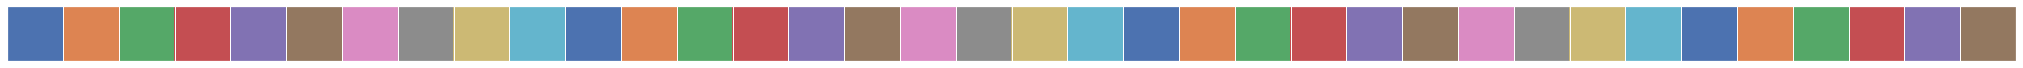

In [45]:
Use_palette = sns.color_palette('deep',36)
Use_palette = Use_palette.as_hex()
sns.palplot(Use_palette)
len(SegIDs)
ColorDict = {}
for idx, SegId in enumerate(SegIDs):
    ColorDict[SegId] = Use_palette[idx]

In [52]:
#fig = go.Figure()
fig = make_subplots(rows =2, cols =1, shared_xaxes=True,
subplot_titles=("Hourly Speed (EB Dir)","Hourly Speed (WB Dir)"))
gr = 0
for SegId in SegIDs:
    maskEB = (MerDat_Hr.direction =="EASTBOUND") & (MerDat_Hr.CorRouteNo ==SegId)
    NameSen =SegId
    gr = gr+1
    fig.add_trace(go.Scatter(x = MerDat_Hr.loc[maskEB,'measurement_tstamp'], y = MerDat_Hr.loc[maskEB,'SMS'], name=NameSen
                             ,legendgroup ='gr{}'.format(gr)
                            ,line =dict(color=ColorDict[SegId])), row =1, col=1)
gr =0
for SegId in SegIDs:
    maskWB = (MerDat_Hr.direction =="WESTBOUND") & (MerDat_Hr.CorRouteNo ==SegId)
    NameSen =SegId
    gr = gr+1
    fig.add_trace(go.Scatter(x = MerDat_Hr.loc[maskWB,'measurement_tstamp'], y = MerDat_Hr.loc[maskWB,'SMS'], name=NameSen
                             ,legendgroup ='gr{}'.format(gr)
                            ,line =dict(color=ColorDict[SegId]),showlegend=False), row =2, col=1)
fig.update_layout(plot_bgcolor = 'rgb(220,220,220)', shapes= [
    #1st highlight during Feb 3rd to 4th (1st Sat Sun)
    go.layout.Shape(
    type = 'rect',
    xref='x',
    yref ='paper',
    x0= '2018-02-03',
    y0 = 0,
    x1 = '2018-02-05',
    y1= 1,
    fillcolor = "LightSalmon",
    opacity = 0.5,
    layer = "below",
    line_width = 0),
    
    go.layout.Shape(
    type = 'rect',
    xref='x',
    yref ='paper',
    x0= '2018-02-10',
    y0 = 0,
    x1 = '2018-02-12',
    y1= 1,
    fillcolor = "LightSalmon",
    opacity = 0.5,
    layer = "below",
    line_width = 0),
    
    go.layout.Shape(
    type = 'rect',
    xref='x',
    yref ='paper',
    x0= '2018-02-17',
    y0 = 0,
    x1 = '2018-02-19',
    y1= 1,
    fillcolor = "LightSalmon",
    opacity = 0.5,
    layer = "below",
    line_width = 0),
    
    go.layout.Shape(
    type = 'rect',
    xref='x',
    yref ='paper',
    x0= '2018-02-24',
    y0 = 0,
    x1 = '2018-02-26',
    y1= 1,
    fillcolor = "LightSalmon",
    opacity = 0.5,
    layer = "below",
    line_width = 0)
])
fig.update_yaxes(range = [0, 100])
fig.show()
plotly.offline.plot(fig,filename = os.path.join(figDir,'NpmrdsHourlySpdPlot.html'),auto_open=False)

'C:\\Users\\abibeka\\OneDrive - Kittelson & Associates, Inc\\Documents\\Github\\Hive-SDC\\FreevalPlots\\NpmrdsHourlySpdPlot.html'

## Get the Shape File to join the location of the NPMRDS Segments with Speed Sensor Data

In [5]:
datDir
fp = os.path.join(datDir,'Wyoming','Wyoming.shp')
WyShpDat = gpd.read_file(fp)
WyShpDat.dtypes

Tmc            object
TmcType        object
RoadNumber     object
RoadName       object
IsPrimary      object
FirstName      object
TmcLinear       int64
Country        object
State          object
County         object
Zip            object
Direction      object
StartLat      float64
StartLong     float64
EndLat        float64
EndLong       float64
Miles         float64
FRC             int64
Border_Set     object
F_System        int64
Urban_Code      int64
FacilType       int64
StrucType     float64
ThruLanes       int64
Route_Numb      int64
Route_Sign      int64
Route_Qual      int64
AltRteName     object
AADT            int64
AADT_Singl      int64
AADT_Combi      int64
NHS             int64
NHS_Pct         int64
Strhnt_Typ      int64
Strhnt_Pct      int64
Truck           int64
geometry       object
dtype: object

In [56]:
type(WyShpDat)

geopandas.geodataframe.GeoDataFrame

Use Shape Data for only Our Study Segments

In [85]:
WyShpDat_StdSeg = WyShpDat.merge(TmcDat1[TmcDat1.direction=='EASTBOUND'],left_on='Tmc',right_on = 'tmc',how ='right')
WyShpDat_StdSeg

Tmc TmcType RoadNumber RoadName IsPrimary  \
0   117-04564      P1         80   I-80 E         1   
1   117N04555      P1         80   I-80 E         1   
2   117N04548      P1         80   I-80 E         1   
3   117N04552      P1         80   I-80 E         1   
4   117-04551      P1         80   I-80 E         1   
5   117-04563      P1         80   I-80 E         1   
6   117-04565      P1         80   I-80 E         1   
7   117-04561      P1         80   I-80 E         1   
8   117-04562      P1         80   I-80 E         1   
9   117-04556      P1         80   I-80 E         1   
10  117-04559      P1         80   I-80 E         1   
11  117-04555      P1         80   I-80 E         1   
12  117-04558      P1         80   I-80 E         1   
13  117-04552      P1         80   I-80 E         1   
14  117N04560      P1         80   I-80 E         1   
15  117-04554      P1         80   I-80 E         1   
16  117N04554      P1         80   I-80 E         1   
17  117N04553      P1         80   I-80 E         1   
18  117-04557      P1         80   I-80 E         1   
19  117-04560      P1         80   I-80 E         1   
20  117N04550      P1         80   I-80 E         1   
21  117N04551      P1         80   I-80 E         1   
22  117-04549      P1         80   I-80 E         1   
23  117N04556      P1         80   I-80 E         1   
24  117N04562      P1         80   I-80 E         1   
25  117-04548      P1         80   I-80 E         1   
26  117N04559      P1         80   I-80 E         1   
27  117N04561      P1         80   I-80 E         1   
28  117N04557      P1         80   I-80 E         1   
29  117N04558      P1         80   I-80 E         1   
30  117N04549      P1         80   I-80 E         1   
31  117N04565      P1         80   I-80 E         1   
32  117N04563      P1         80   I-80 E         1   
33  117N04564      P1         80   I-80 E         1   
34  117-04553      P1         80   I-80 E         1   
35  117-04550      P1         80   I-80 E         1   

                         FirstName  TmcLinear        Country    State  \
0   WY-230/Snowy Range Rd/Exit 311         76  United States  Wyoming   
1                 Otto Rd/Exit 348         76  United States  Wyoming   
2                  WY-217/Exit 377         76  United States  Wyoming   
3             I-180/US-85/Exit 362         76  United States  Wyoming   
4                    I-80/Exit 364         76  United States  Wyoming   
5         US-287/S 3rd St/Exit 313         76  United States  Wyoming   
6             W Curtis St/Exit 310         76  United States  Wyoming   
7    WY-210/Happy Jack Rd/Exit 323         76  United States  Wyoming   
8    I-80/US-30/Grand Ave/Exit 316         76  United States  Wyoming   
9               Warren Rd/Exit 345         76  United States  Wyoming   
10        North Buford Rd/Exit 335         76  United States  Wyoming   
11                Otto Rd/Exit 348         76  United States  Wyoming   
12             Remount Rd/Exit 339         76  United States  Wyoming   
13            I-180/US-85/Exit 362         76  United States  Wyoming   
14       Vedauwoo Glen Rd/Exit 329         76  United States  Wyoming   
15                   I-80/Exit 358         76  United States  Wyoming   
16                   I-80/Exit 358         76  United States  Wyoming   
17             I-25/US-87/Exit 359         76  United States  Wyoming   
18            Harriman Rd/Exit 342         76  United States  Wyoming   
19       Vedauwoo Glen Rd/Exit 329         76  United States  Wyoming   
20           Campstool Rd/Exit 367         76  United States  Wyoming   
21                   I-80/Exit 364         76  United States  Wyoming   
22                  US-30/Exit 370         76  United States  Wyoming   
23              Warren Rd/Exit 345         76  United States  Wyoming   
24   I-80/US-30/Grand Ave/Exit 316         76  United States  Wyoming   
25                 WY-217/Exit 377         76  United States  Wyoming   
26 

Merge WyShpDat with the Speed Sensor Location of the Speed Sensors we are using

In [86]:
Fi = os.path.join(r'C:\Users\abibeka\OneDrive - Kittelson & Associates, Inc\Documents\CVPD\I80_Laramie-to-Cheyenne_Feb_2018\SensorLoc.csv')
SpeedSenLoc = pd.read_csv(Fi)

In [87]:
SpeedSenLoc

Unnamed: 0               Name        Lat        Long
0            0  Speed Sensor-1327  41.443910 -105.961280
1            1  Speed Sensor-1342  41.395020 -105.824060
2            2  Speed Sensor-1839  41.116867 -104.904434
3            3  Speed Sensor-2146  41.246296 -105.441190
4            4  Speed Sensor-2319  41.109592 -104.974880
5            5  Speed Sensor-3911  41.264910 -105.466180
6            6   Speed Sensor-396  41.279910 -105.516990
7            7  Speed Sensor-3482  41.159320 -104.605880
8            8   Speed Sensor-382  41.172596 -104.083160
9            9  Speed Sensor-2146  41.246296 -105.441190
10          10  Speed Sensor-3911  41.264910 -105.466180
11          11   Speed Sensor-396  41.279910 -105.516990

In [88]:


geometry = [Point(xy) for xy in zip(SpeedSenLoc.Long, SpeedSenLoc.Lat)]
df = SpeedSenLoc.drop(['Long', 'Lat'], axis=1)
crs = {'init': 'epsg:4326'}
SpeedSenLoc_gdf = GeoDataFrame(SpeedSenLoc, crs=crs, geometry=geometry)
SpeedSenLoc_gdf

Unnamed: 0               Name        Lat        Long  \
0            0  Speed Sensor-1327  41.443910 -105.961280   
1            1  Speed Sensor-1342  41.395020 -105.824060   
2            2  Speed Sensor-1839  41.116867 -104.904434   
3            3  Speed Sensor-2146  41.246296 -105.441190   
4            4  Speed Sensor-2319  41.109592 -104.974880   
5            5  Speed Sensor-3911  41.264910 -105.466180   
6            6   Speed Sensor-396  41.279910 -105.516990   
7            7  Speed Sensor-3482  41.159320 -104.605880   
8            8   Speed Sensor-382  41.172596 -104.083160   
9            9  Speed Sensor-2146  41.246296 -105.441190   
10          10  Speed Sensor-3911  41.264910 -105.466180   
11          11   Speed Sensor-396  41.279910 -105.516990   

                         geometry  
0     POINT (-105.96128 41.44391)  
1     POINT (-105.82406 41.39502)  
2   POINT (-104.904434 41.116867)  
3    POINT (-105.44119 41.246296)  
4    POINT (-104.97488 41.109592)  
5     POINT (-105.46618 41.26491)  
6     POINT (-105.51699 41.27991)  
7     POINT (-104.60588 41.15932)  
8    POINT (-104.08316 41.172596)  
9    POINT (-105.44119 41.246296)  
10    POINT (-105.46618 41.26491)  
11    POINT (-105.51699 41.27991)

In [108]:
def min_distance(point, lines):
    mask = abs(lines.distance(point))<=lines.distance(point).min()
    #return mask
    return max(lines.loc[mask,'CorRouteNo'])

SpeedSenLoc_gdf.loc[:,"ClosestSeg"] = SpeedSenLoc_gdf.geometry.apply(min_distance, args=(WyShpDat_StdSeg,))
SpeedSenLoc_gdf.loc[:,'DeviceID'] = SpeedSenLoc_gdf.Name.str.split('-',expand=True)[1]
SpeedSenLoc_gdf = SpeedSenLoc_gdf[['DeviceID','ClosestSeg']]


AttributeError: 'DataFrame' object has no attribute 'geometry'

In [111]:
SpeedSenLoc_gdf.DeviceID = SpeedSenLoc_gdf.DeviceID.astype(int)

C:\Users\abibeka\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [114]:
Fi = os.path.join(r'C:\Users\abibeka\OneDrive - Kittelson & Associates, Inc\Documents\CVPD\I80_Laramie-to-Cheyenne_Feb_2018\SpeedSensorIndex.xlsx')
x1 = pd.ExcelFile(Fi)
x1.sheet_names
SensrDat= x1.parse('Sheet1', usecols =['DEVICEID','SITENAME','Sensor_Loc','MP'])
SensrDat.columns = ['DeviceID','Sitename','MP','SensorLoc']
SensorIDs = [1327, 1342, 396, 3911, 2146, 2319, 1839, 3482, 382]
SensrDat = SensrDat[SensrDat.DeviceID.isin(SensorIDs)]
SensrDat = SensrDat.merge(SpeedSenLoc_gdf,left_on='DeviceID',right_on ='DeviceID',how='left')
SensrDat.to_csv(os.path.join(datDir,'SpeedSensor_Npmrds.csv'))